In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [3]:
fld = glob.glob('uber\*')

In [4]:
for i in fld:
    print(len(pd.read_csv(i)))

564516
829275
796121
663844
652435
1028136


In [16]:
df = pd.read_csv(fld[0], parse_dates = ["Date/Time"])

(-74.3, -73.7)

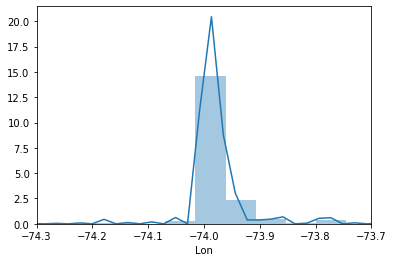

In [6]:
sns.distplot(df.Lon)
plt.xlim([-74.3,-73.7])

(40.6, 40.9)

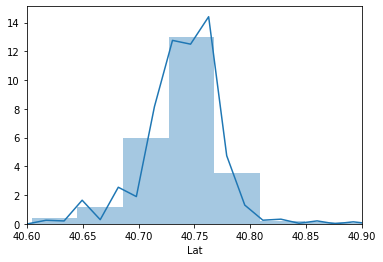

In [7]:
sns.distplot(df.Lat)
plt.xlim([40.6,40.9])

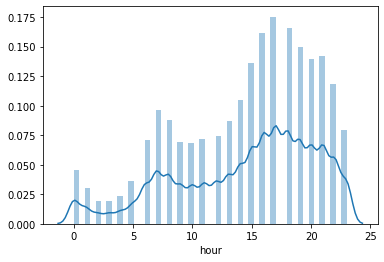

In [21]:
sns.distplot(df.hour)

In [17]:
df = df[(df.Lon.between(-74.3, -73.7))&(df.Lat.between(40.6, 40.9))]

In [18]:
df['hour'] = df['Date/Time'].dt.hour
df['day'] = df['Date/Time'].dt.weekday
df = df.drop(columns = 'Date/Time')

In [35]:
df = pd.concat([df.drop(columns = 'Base'),pd.get_dummies(df[['Base']])],axis = 1)

In [36]:
loc = df[['Lat','Lon']]

In [37]:
hour = df[['hour']]

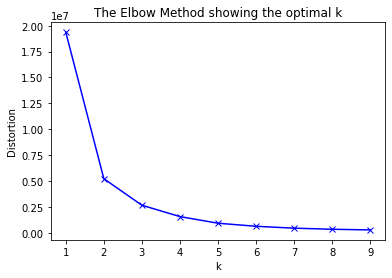

In [38]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(hour)
    kmeanModel.fit(hour)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [49]:
modhour2 = KMeans(n_clusters = 2)
modhour2.fit(hour)
modhour3 = KMeans(n_clusters = 3)
modhour3.fit(hour)
modhour4 = KMeans(n_clusters = 4)
modhour4.fit(hour)

KMeans(n_clusters=4)

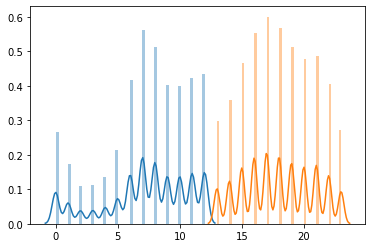

In [46]:
sns.distplot(hour[modhour2.predict(hour) == 0])
sns.distplot(hour[modhour2.predict(hour) == 1])

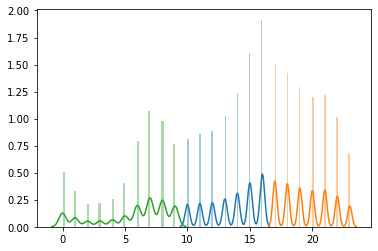

In [47]:
sns.distplot(hour[modhour3.predict(hour) == 0])
sns.distplot(hour[modhour3.predict(hour) == 1])
sns.distplot(hour[modhour3.predict(hour) == 2])

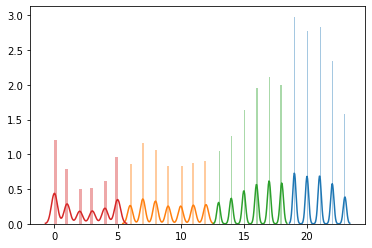

In [50]:
sns.distplot(hour[modhour4.predict(hour) == 0])
sns.distplot(hour[modhour4.predict(hour) == 1])
sns.distplot(hour[modhour4.predict(hour) == 2])
sns.distplot(hour[modhour4.predict(hour) == 3])

In [48]:
def time(x):
    if (x >=0) & (x < 10):
        return 'morning'
    elif (x >= 10) & (x < 17):
        return 'afternoon'
    else:
        return 'night'
df['timeday'] = df['hour'].apply(time)

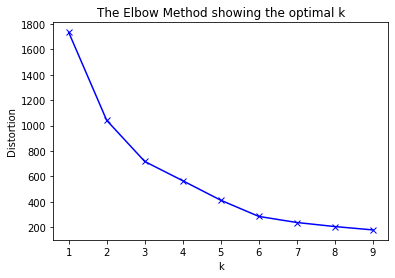

In [12]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [53]:
dfsil = df[['Lat','Lon','hour']]

In [55]:
from sklearn.metrics import silhouette_score

ksil = KMeans(n_clusters = 2).fit(dfsil)
silhouette_score(dfsil, kmeanModel.labels_, metric = 'euclidean')

KeyboardInterrupt: 

from sklearn.metrics import silhouette_score

sil = []
kmax = 10


for k in range(2, 5):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))

plt.plot(range(2,11), sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1= sc.fit_transform(df)

In [45]:
mod4 = KMeans(n_clusters = 4)
mod4.fit(df)
y_k4 = mod4.predict(df)
mod5 = KMeans(n_clusters = 5)
mod5.fit(df)
y_k5 = mod5.predict(df)
mod6 = KMeans(n_clusters = 6)
mod6.fit(df)
y_k6 = mod6.predict(df)

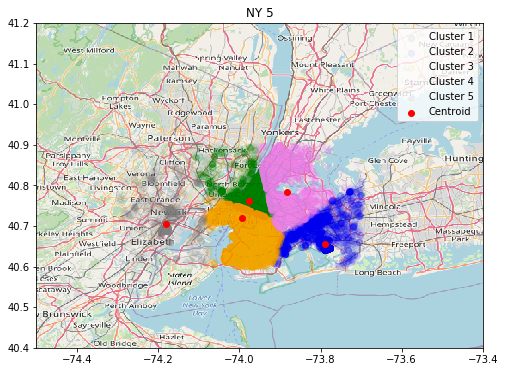

In [49]:
Bbox1 = (-74.5,-73.4,40.4,41.2)
ruh_m = plt.imread(r'map.png')
fig, ax = plt.subplots(figsize = (8,7))
alpha = 0.05
ax.scatter(df.iloc[:,1][y_k5 == 0], df.iloc[:,0][y_k5 == 0],
            c='green', label='Cluster 1',alpha = alpha)
ax.scatter(df.iloc[:,1][y_k5 == 1], df.iloc[:,0][y_k5 == 1],
            c='blue', label='Cluster 2', alpha = alpha)
ax.scatter(df.iloc[:,1][y_k5 == 2], df.iloc[:,0][y_k5 == 2],
            c='orange', label='Cluster 3', alpha = alpha)
ax.scatter(df.iloc[:,1][y_k5 == 3], df.iloc[:,0][y_k5 == 3],
            c='violet', label='Cluster 4', alpha = alpha)
ax.scatter(df.iloc[:,1][y_k5 == 4], df.iloc[:,0][y_k5 == 4],
            c='grey', label='Cluster 5', alpha = alpha)
ax.scatter(mod5.cluster_centers_[:,1], mod5.cluster_centers_[:,0],c='red', label='Centroid',alpha = 1)
ax.set_title('NY 5')
ax.legend()
ax.set_xlim(Bbox1[0],Bbox1[1])
ax.set_ylim(Bbox1[2],Bbox1[3])
ax.imshow(ruh_m, zorder=0, extent = Bbox1, aspect= 'equal')


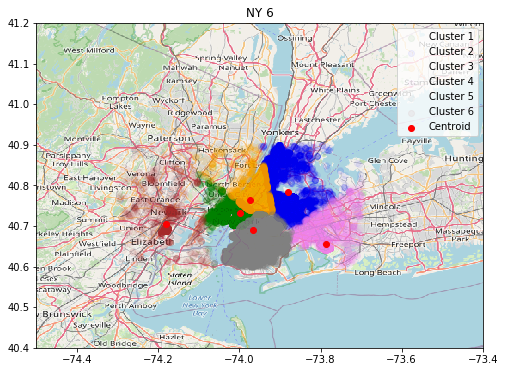

In [51]:
Bbox1 = (-74.5,-73.4,40.4,41.2)
ruh_m = plt.imread(r'map.png')
fig, ax = plt.subplots(figsize = (8,7))
alpha = 0.05
ax.scatter(df.iloc[:,1][y_k6 == 0], df.iloc[:,0][y_k6 == 0],
            c='green', label='Cluster 1',alpha = alpha)
ax.scatter(df.iloc[:,1][y_k6 == 1], df.iloc[:,0][y_k6 == 1],
            c='blue', label='Cluster 2', alpha = alpha)
ax.scatter(df.iloc[:,1][y_k6 == 2], df.iloc[:,0][y_k6 == 2],
            c='orange', label='Cluster 3', alpha = alpha)
ax.scatter(df.iloc[:,1][y_k6 == 3], df.iloc[:,0][y_k6 == 3],
            c='violet', label='Cluster 4', alpha = alpha)
ax.scatter(df.iloc[:,1][y_k6 == 4], df.iloc[:,0][y_k6 == 4],
            c='grey', label='Cluster 5', alpha = alpha)
ax.scatter(df.iloc[:,1][y_k6 == 5], df.iloc[:,0][y_k6 == 5],
            c='brown', label='Cluster 6', alpha = alpha)
ax.scatter(mod6.cluster_centers_[:,1], mod6.cluster_centers_[:,0],c='red', label='Centroid',alpha = 1)
ax.set_title('NY 6')
ax.legend()
ax.set_xlim(Bbox1[0],Bbox1[1])
ax.set_ylim(Bbox1[2],Bbox1[3])
ax.imshow(ruh_m, zorder=0, extent = Bbox1, aspect= 'equal')


In [57]:
conda install scikit-learn=0.15

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - scikit-learn=0.15

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [58]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5, min_samples = 50,algorithm='ball_tree', metric='haversine')
db.fit(df)

MemoryError: 

In [ ]:
dbscan_predict